In [1]:
import numpy as np
import pandas as pd
import plotly 

import matplotlib.pyplot as plt
import matplotlib as mpl

from terminal_optimization import hydrogen_objects
from terminal_optimization import hydrogen_defaults
from terminal_optimization import hydrogen_system

plotly.tools.set_credentials_file(username='stephh', api_key='aYheUBjQH0kyWL5yo9E6')

# 0. Prepare inputs

In [2]:
startyear = 2019
lifecycle = 10

## 0.1 Generate demand forecast scenario

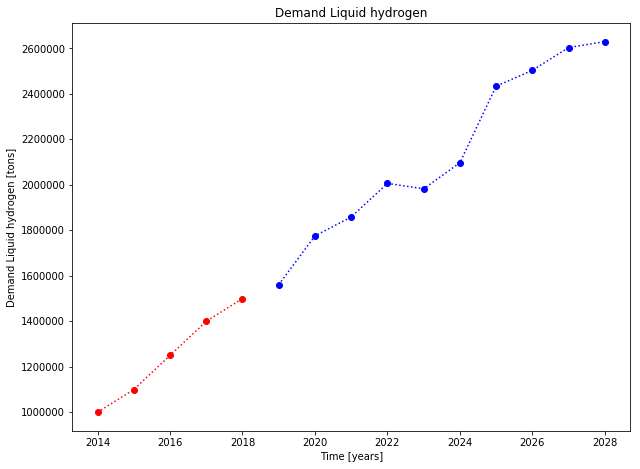

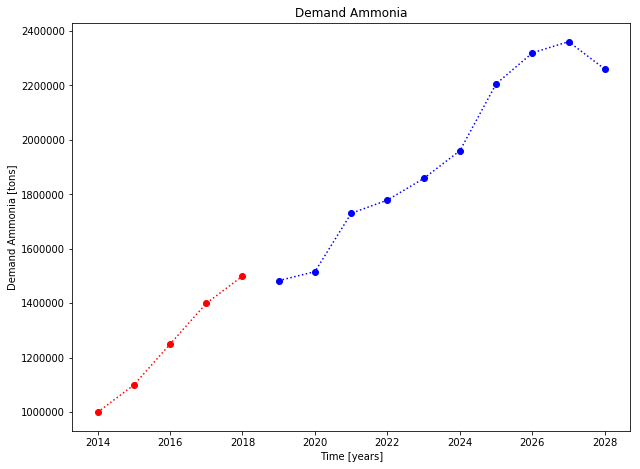

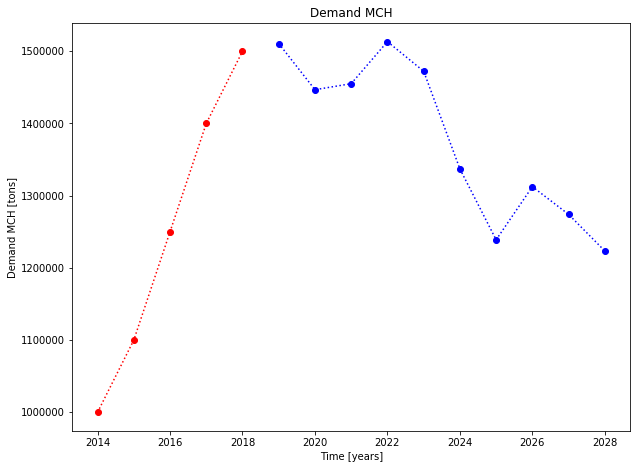

In [3]:
scenario = 'permanent' #choice between permanent or random

if scenario == 'random': 
    # instantiate a commodity object
    lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_lhydrogen_data)
    ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_ammonia_data)
    MCH = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_MCH_data)

    # create a future througput scenario
    lhydrogen.scenario_random(startyear = startyear, lifecycle = lifecycle)
    ammonia.scenario_random(startyear = startyear, lifecycle = lifecycle)
    MCH.scenario_random(startyear = startyear, lifecycle = lifecycle)

    demand = [lhydrogen]

    # plot scenarios 
    if True:
        lhydrogen.plot_demand()
        ammonia.plot_demand()
        MCH.plot_demand()
else: 
    years = list(range(startyear, startyear+lifecycle))

    demand = []
    for year in years: 
        if year < 2024: 
            demand.append(300_000)
        else: 
            demand.append(1_000_000)

    scenario_data={'year': years, 'volume': demand}

    # instantiate a commodity objects
    lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_lhydrogen_data)
    lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)

    # Ammonia
    hydrogen_defaults.commodity_ammonia_data['historic_data'] = []
    hydrogen_defaults.commodity_ammonia_data['scenario_data'] = []
    ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_ammonia_data)

    # MCH
    hydrogen_defaults.commodity_MCH_data['historic_data'] = []
    hydrogen_defaults.commodity_MCH_data['scenario_data'] = []
    MCH = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_MCH_data)

    # combine
    demand = [lhydrogen, ammonia, MCH]

    # plot scenarios 
    if False:
        lhydrogen.plot_demand()
        ammonia.plot_demand()
        MCH.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
Smallhydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.smallhydrogen_data)
Largehydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.largehydrogen_data)
Smallammonia = hydrogen_objects.Vessel(**hydrogen_defaults.smallammonia_data)
Largeammonia = hydrogen_objects.Vessel(**hydrogen_defaults.largeammonia_data)
Handysize = hydrogen_objects.Vessel(**hydrogen_defaults.handysize_data)
Panamax = hydrogen_objects.Vessel(**hydrogen_defaults.panamax_data)
VLCC = hydrogen_objects.Vessel(**hydrogen_defaults.vlcc_data)


vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC] 

# 1. Instatiate terminal system

In [5]:
Terminal = hydrogen_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 0
     Small Hydrogen  calls: 0
     Large Hydrogen calls: 0
     Small ammonia calls: 0
     Large ammonia calls: 0
     Handysize calls: 0
     Panamax calls: 0
     VLCC calls: 0
  Total cargo volume: 0.0
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Unloading occupancy planned (@ start of year): inf
     Unloading occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): nan
     throughput online 0
     throughput planned 0
  *** add Berth to elements
     Berth occupancy planned (after adding berth):

c:\users\stephanie lanphen\documents\terminal-optimization\src\terminal_optimization\hydrogen_system.py:1214: RuntimeWarning:

invalid value encountered in double_scalars



     a total of 0 ton of h2retrieval capacity is online; 408800 ton total planned
  *** add h2retrieval to elements
     a total of 0 ton of h2retrieval capacity is online; 613200 ton total planned
  *** add h2retrieval to elements
     a total of 0 ton of h2retrieval capacity is online; 817600 ton total planned
  *** add h2retrieval to elements
     a total of 0 ton of h2retrieval capacity is online; 1022000 ton total planned
  *** add h2retrieval to elements
     a total of 0 ton of h2retrieval capacity is online; 1226400 ton total planned
  *** add h2retrieval to elements
     a total of 0 ton of h2retrieval capacity is online; 1430800 ton total planned
  *** add h2retrieval to elements
     a total of 0 ton of h2retrieval capacity is online; 1635200 ton total planned
  *** add station to elements
  *** add Hinter Pipeline to elements
     a total of 0 ton of pipeline hinterland service capacity is online; 4000 ton total planned

Simulate year: 2020
  Total vessel calls: 0
     Smal

  Total vessel calls: 135
     Small Hydrogen  calls: 76
     Large Hydrogen calls: 59
     Small ammonia calls: 0
     Large ammonia calls: 0
     Handysize calls: 0
     Panamax calls: 0
     VLCC calls: 0
  Total cargo volume: 2503680.0
     a total of 1 Berth_01 is online; 1 total planned
     a total of 1 Jetty_01 is online; 1 total planned
     a total of 1 jetty_pipeline_01 is online; 1 total planned
     a total of 3 ATank_01 is online; 3 total planned
     a total of 11 H2retrieval_NH3_01 is online; 12 total planned
     a total of 1 hinterland_pipeline_01 is online; 1 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.300513698630137
     Berth occupancy online (@ start of year): 0.300513698630137
     Unloading occupancy planned (@ start of year): 0.23116438356164384
     Unloading occupancy online (@ start of year): 0.23116438356164384
     waiting time factor (@ start of year): 0.11812507408395123
     waiting time occupancy (@ start of year

## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Liquid hydrogen

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':    year   volume
0  2019  1561041
1  2020  1775684
2  2021  1858716
3  2022  2006568
4  2023  1982406
5  2024  2097333
6  2025  2433927
7  2026  2503680
8  2027  2603822
9  2028  2629800, 'type': 'Liquid hydrogen', 'handling_fee': 1000, 'smallhydrogen_perc': 30, 'largehydrogen_perc': 70, 'smallammonia_perc': 0, 'largeammonia_perc': 0, 'handysize_perc': 0, 'panamax_perc': 0, 'vlcc_perc': 0, 'name': 'Liquid hydrogen', 'id': 'bb01f34c-789c-11e9-89d5-c8ff2870e0c9'}

smallhydrogen_1

{'type': 'Smallhydrogen', 'call_size': 10000, 'LOA': 200, 'draft': 10, 'beam': 24, 'max_cranes': 3, 'all_turn_time': 20, 'pump_capacity': 1000, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'smallhydrogen_1', 'id': 'bc06e0c6-789c-11e9-9bef-c8ff2870e0c9'}

largehydrogen_1

{'type': 'Largehydrogen', 'call_size': 30000, 'LOA': 300, 'draft': 12, 'beam': 43, 

9  1.546322e+09  }

H2retrieval_NH3_01

{'triggers': [], 'renevue': [], 'residual': 221400000.0, 'labour': 167900.0, 'maintenance': 4920000.0, 'energy': [], 'insurance': 2460000.0, 'lease': [], 'demurrage': [], 'capex': 246200000, 'type': 'AmmoniaTank', 'ownership': 'Terminal operator', 'delivery_time': 2, 'lifespan': 20, 'unit_rate': 246000000, 'mobilisation_min': 200000, 'mobilisation_perc': 0.003, 'maintenance_perc': 0.02, 'crew_min': 3, 'crew_for5': 1, 'insurance_perc': 0.01, 'h2retrieval_type': 'tank', 'consumption': 5880, 'capacity': 35, 'year_purchase': [], 'year_online': 2027, 'name': 'H2retrieval_NH3_01', 'id': 'bca79cf8-789c-11e9-85e2-c8ff2870e0c9', 'shift': 3.65, 'assetvalue': 221400000.0, 'df':    year        capex  maintenance  insurance    labour     residual  \
0  2019          0.0          0.0        0.0       0.0          0.0   
1  2020          0.0          0.0        0.0       0.0          0.0   
2  2021          0.0          0.0        0.0       0.0          0.0   


In [8]:
# Terminal.add_cashflow_elements()

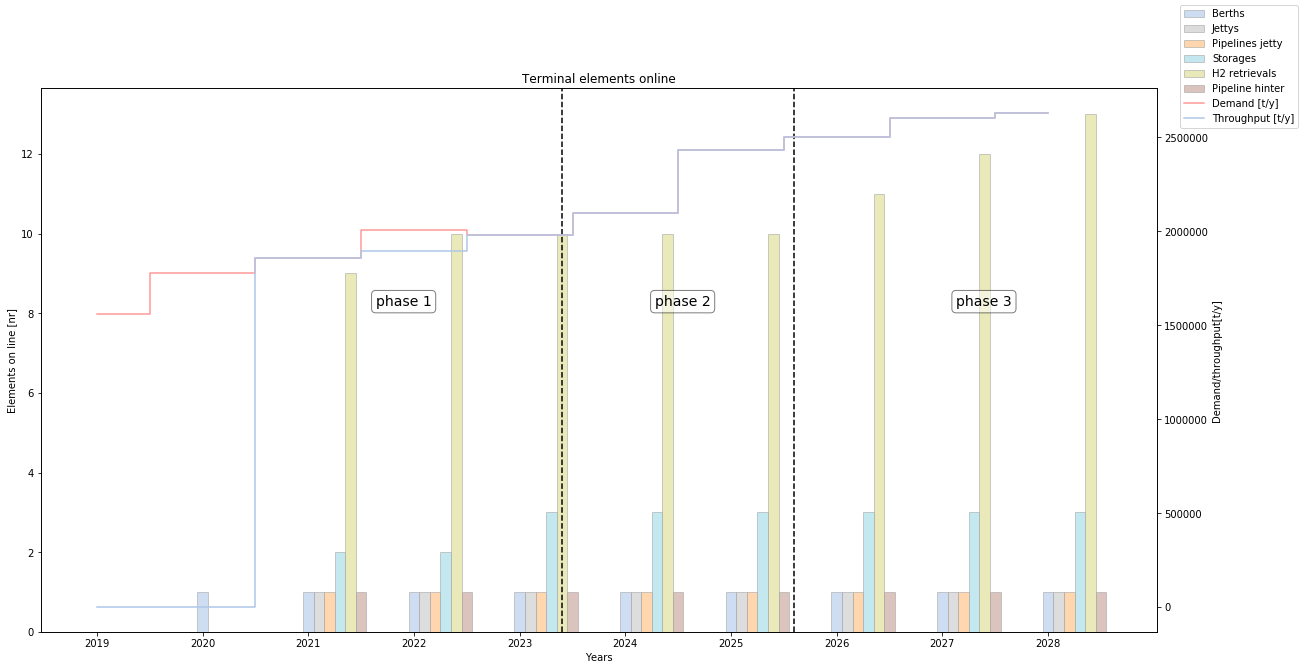

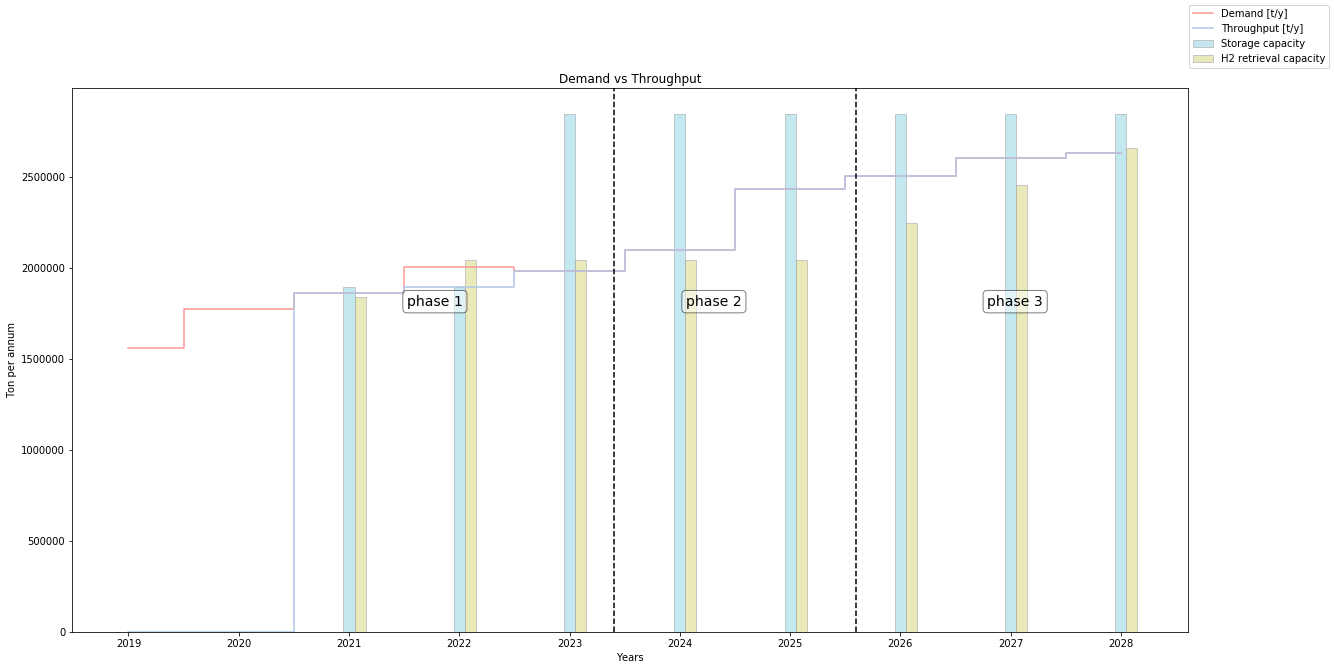

In [9]:
Terminal.terminal_elements_plot()
Terminal.demand_terminal_plot()

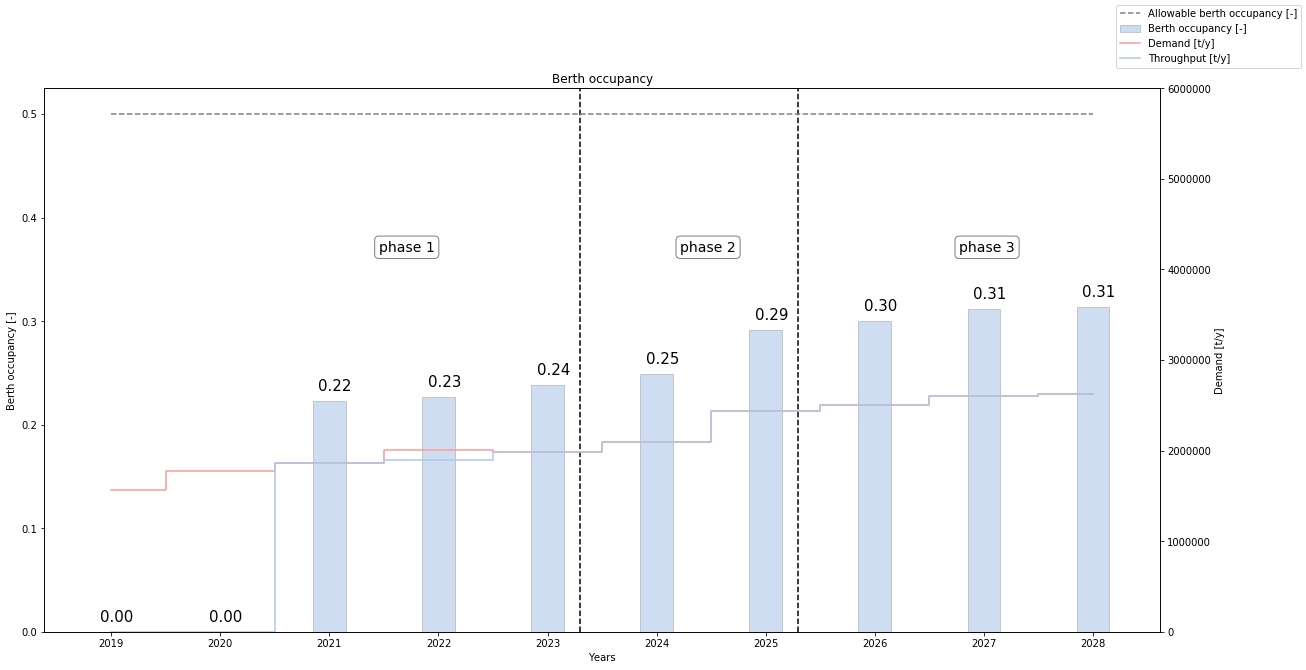

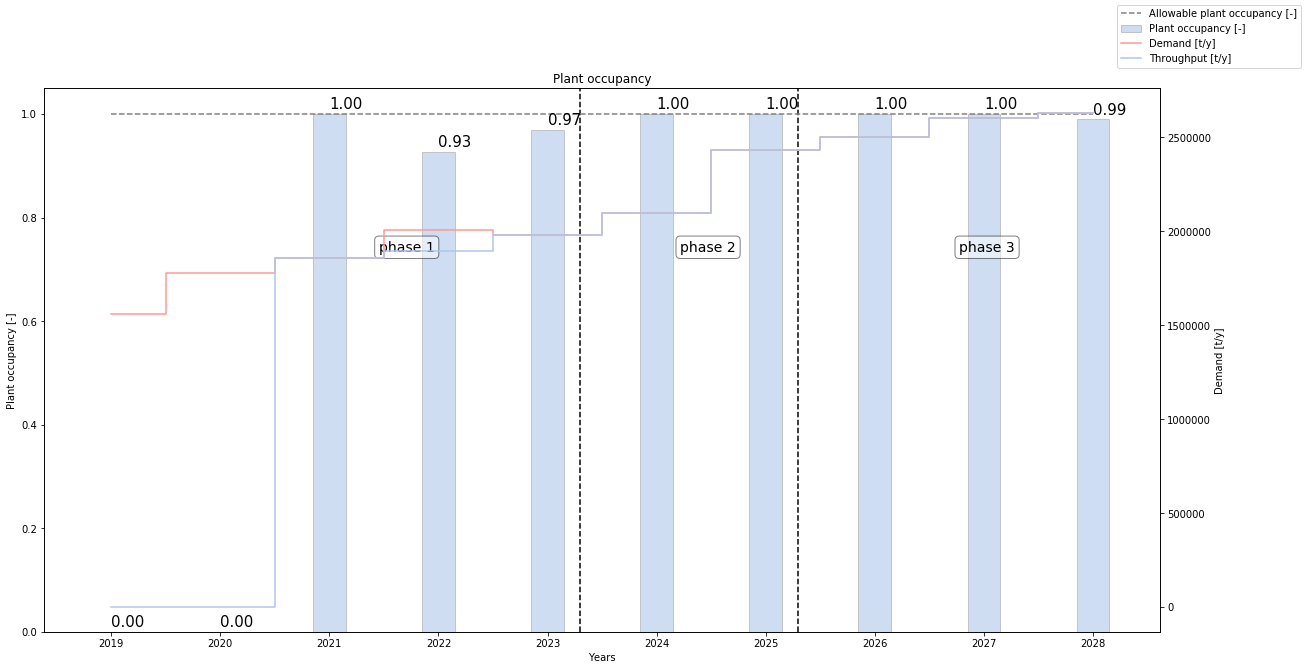

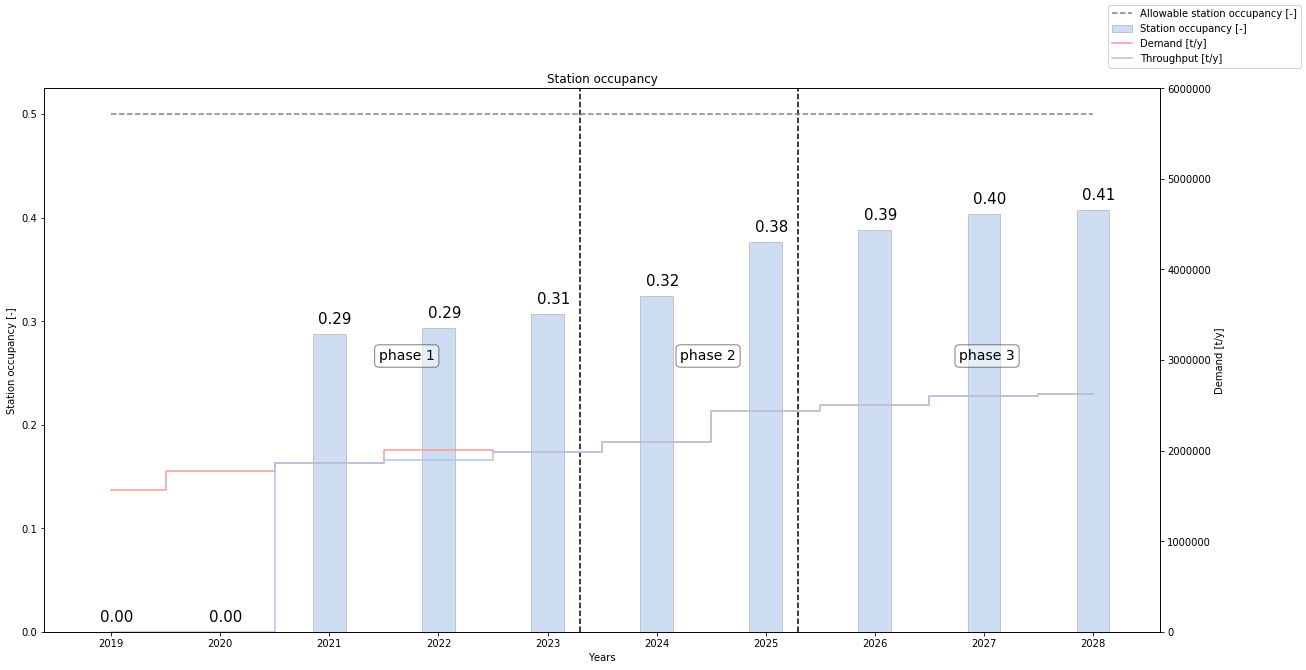

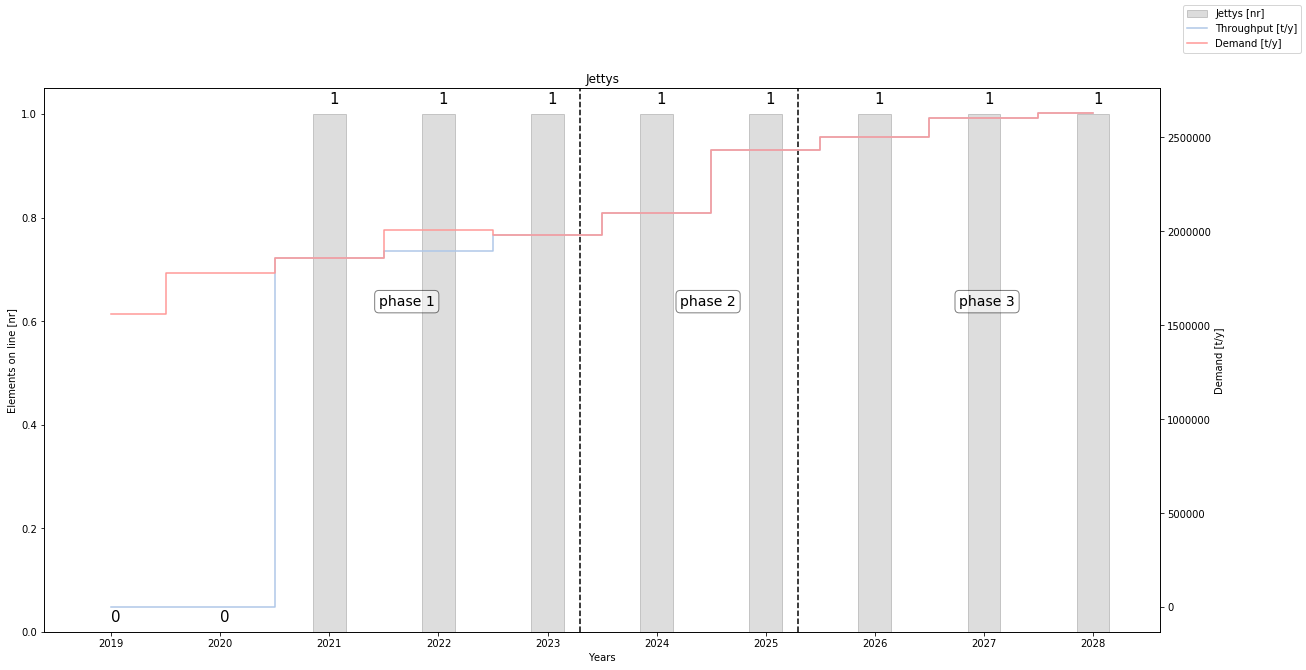

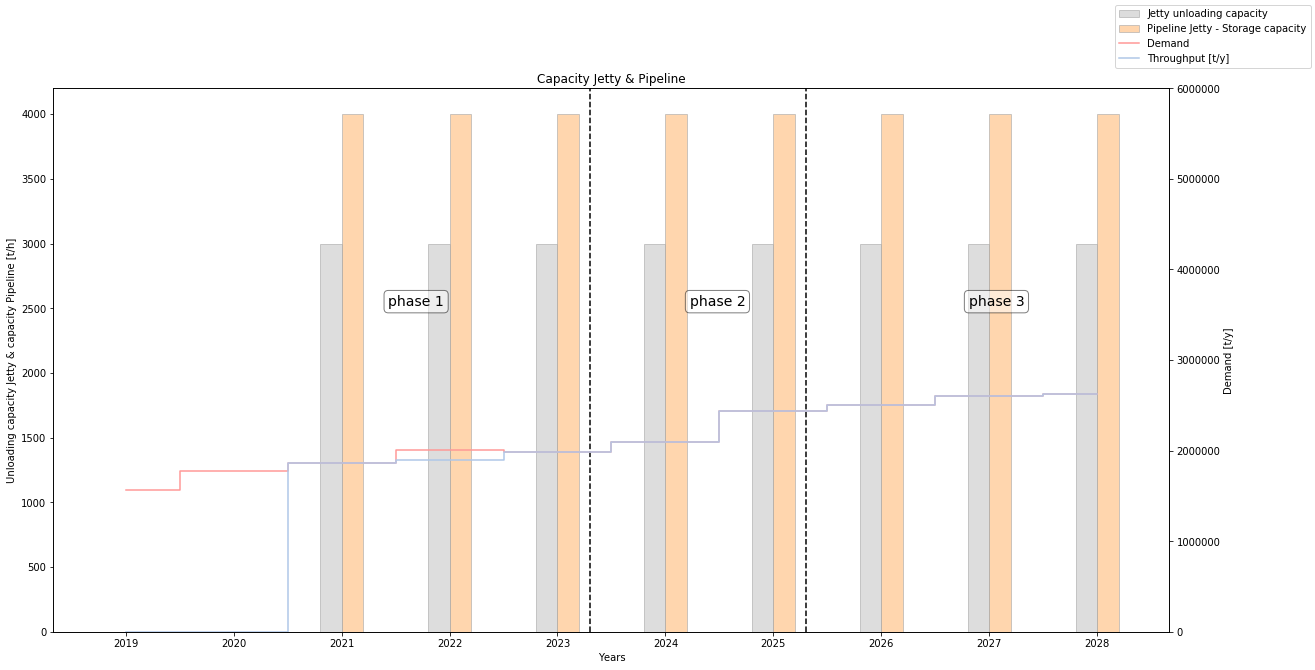

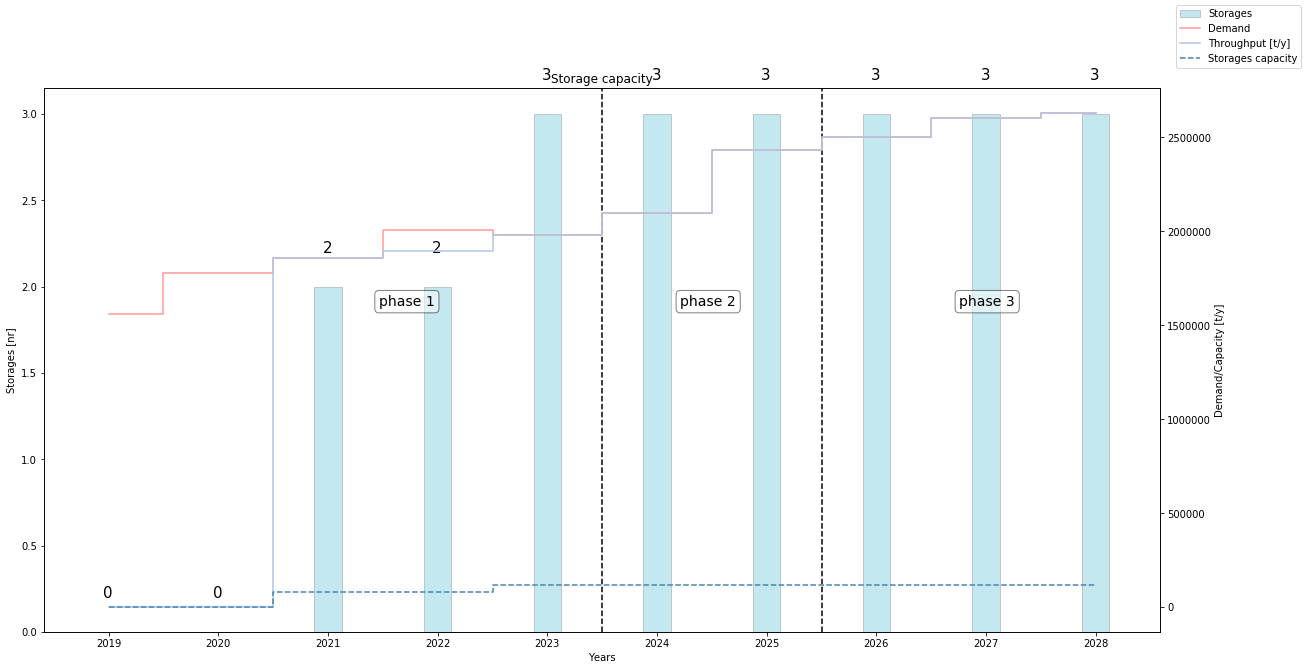

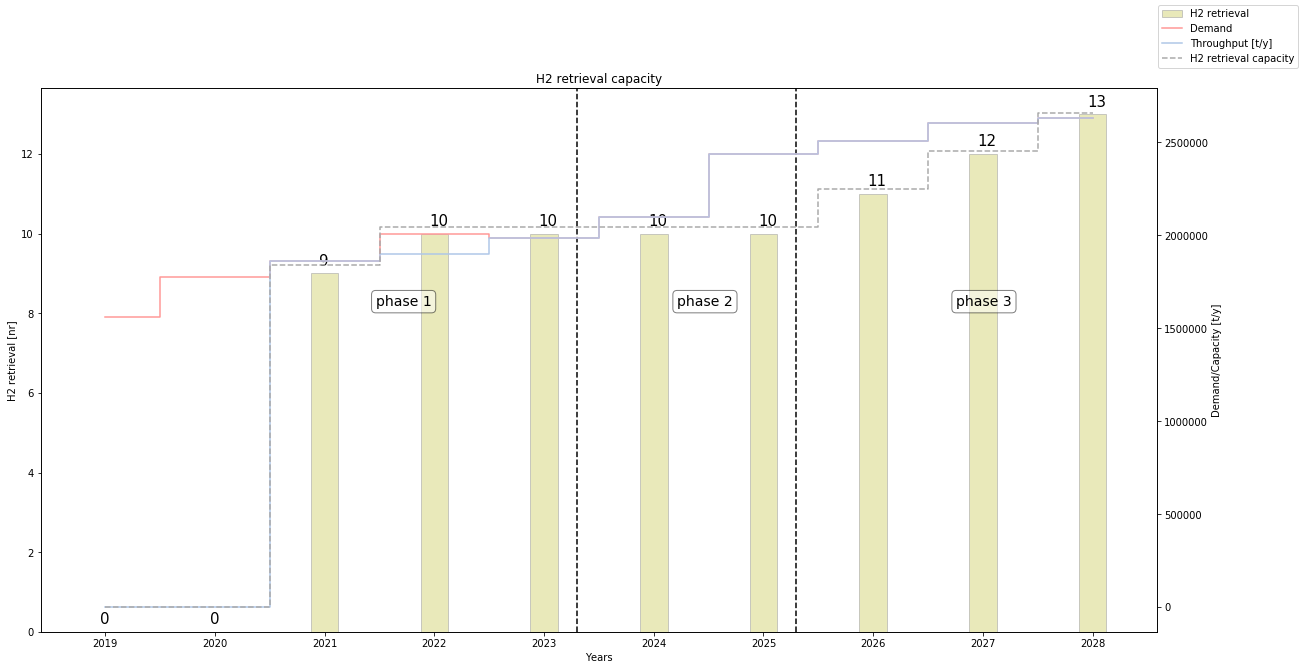

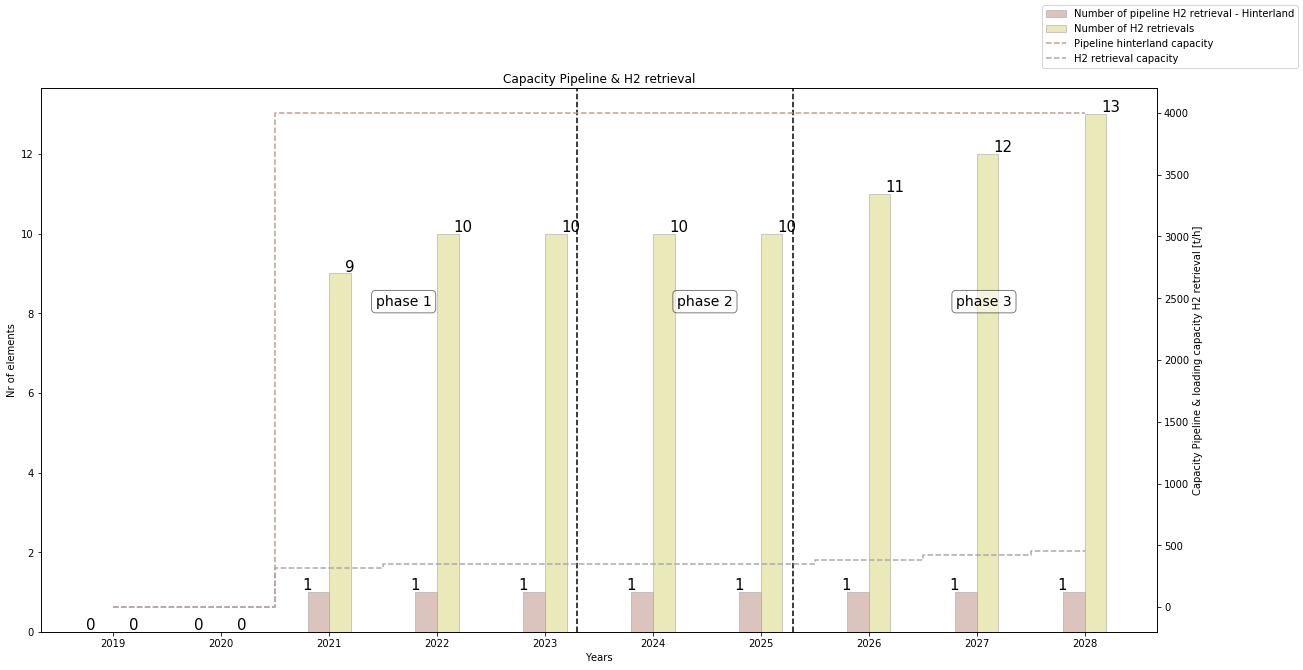

In [10]:
if True: 
    # to plot the terminal occupany's 
    Terminal.terminal_occupancy_plot() #occupancy of the berth 
    Terminal.plant_occupancy_plot() #occupancy of the plant
    Terminal.station_occupancy_plot() #occupancy of the loading station
    
    # to plot the capacities of the different elements 
    Terminal.Jetty_capacity_plot() #jetty
    Terminal.Pipeline1_capacity_plot() #pipeline from jetty to storage
    Terminal.Storage_capacity_plot() #storage
    Terminal.H2retrieval_capacity_plot() # H2 retrieval
    Terminal.Pipeline2_capacity_plot() #pipeline from H2 retrieval to hinterland        

In [11]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

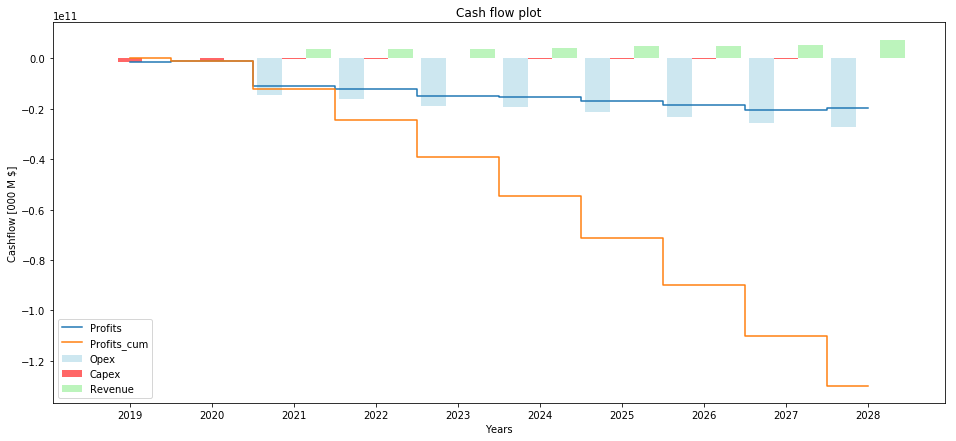

In [12]:
Terminal.cashflow_plot(cash_flows)

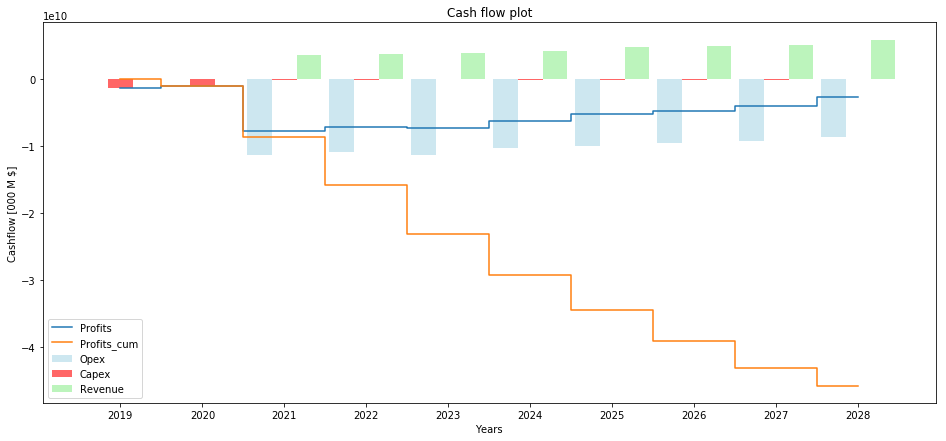

In [13]:
Terminal.cashflow_plot(cash_flows_WACC_real)